In [92]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

'''
data1原数据 data2新数据
'''

'\ndata1原数据 data2新数据\n'

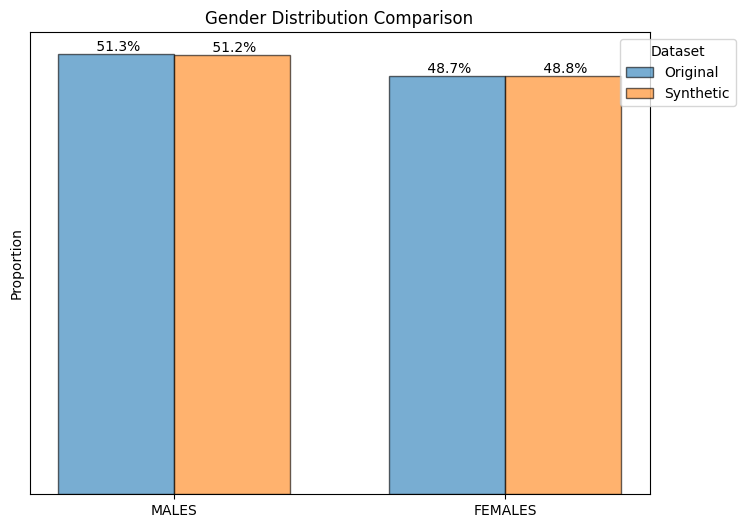

In [33]:
#Plot1.Gender
data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Age group_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

#清洗
data1 = (data1
         .dropna(subset=['feature','number_of_jobs','median_income'])
         .query("gender in ['MALES','FEMALES']")
         .copy())
data1['gender'] = data1['gender'].astype(str).str.strip()
data1['number_of_jobs'] = data1['number_of_jobs'].round().astype(int)
data2['Gender'] = data2['Gender'].astype(str).str.strip()

#统计每个性别的数量（原始=岗位数加总；合成=样本数）
gender_order = ["MALES","FEMALES"]
orig_cnt = (data1.groupby('gender')['number_of_jobs'].sum().reindex(gender_order, fill_value=0))
synth_cnt = (data2['Gender'].value_counts().reindex(gender_order, fill_value=0))

orig_total  = orig_cnt.sum() if orig_cnt.sum() else 1
synth_total = synth_cnt.sum() if synth_cnt.sum() else 1
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

#画分组柱状图
x = np.arange(len(gender_order))
w = 0.35
fig, ax = plt.subplots(figsize=(8,6))

bars1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',edgecolor='black', alpha=0.6)
bars2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic',edgecolor='black', alpha=0.6)

#文字位置微调
y_offset = 0.01 * max(orig_cnt.max(), synth_cnt.max())

def add_labels(bars, props, counts):
    for bar, prop, count in zip(bars, props, counts):
        height = bar.get_height()
        label = f" {prop:.1%}"   # 数量+百分比
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            label,
            ha='center', va='bottom'
        )

add_labels(bars1, orig_prop.values,orig_cnt.values)     
add_labels(bars2, synth_prop.values,synth_cnt.values)     

ax.set_xticks(x); ax.set_xticklabels(gender_order)
ax.set_ylabel("Proportion")
ax.set_title("Gender Distribution Comparison")
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks([]) 
ax.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


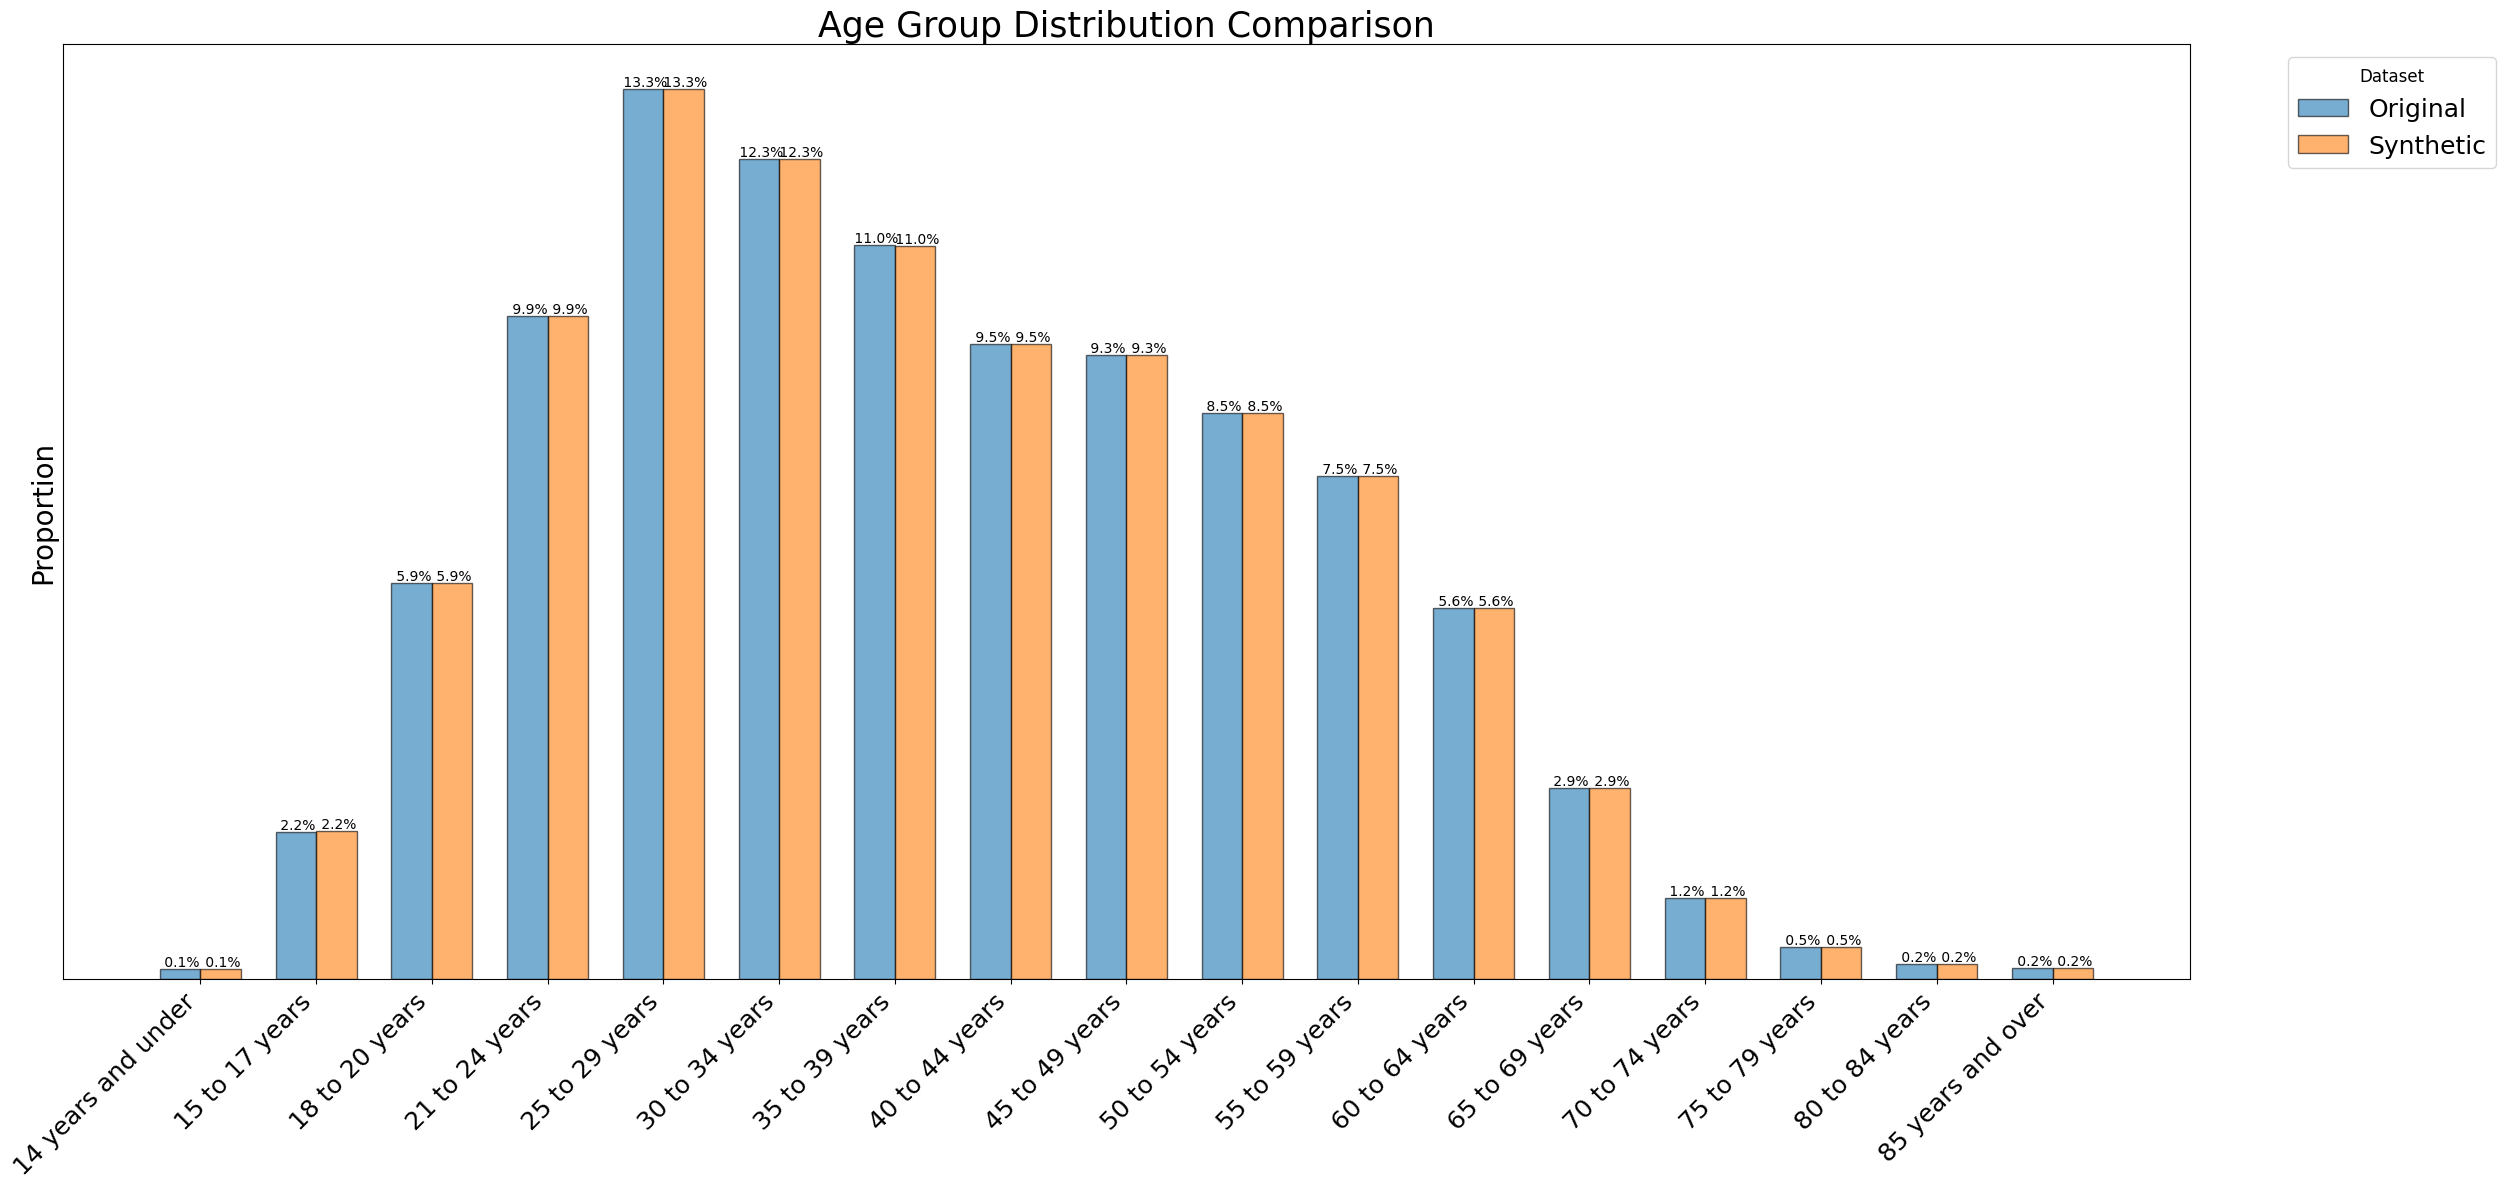

In [80]:
#Plot2.Age Group
data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Age group_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

#清洗
data1 = (data1.dropna(subset=['feature','number_of_jobs','median_income']).query("gender in ['MALES','FEMALES']").copy())
data1['feature'] = data1['feature'].astype(str).str.strip()
data1['number_of_jobs'] = data1['number_of_jobs'].round().astype(int)
data2['AgeGroup'] = data2['AgeGroup'].astype(str).str.strip()

#统计每个AgeGroup的数量（原始=岗位数加总；合成=样本数）
age_order = ["14 years and under","15 to 17 years","18 to 20 years","21 to 24 years","25 to 29 years","30 to 34 years","35 to 39 years",
                "40 to 44 years","45 to 49 years","50 to 54 years","55 to 59 years","60 to 64 years","65 to 69 years","70 to 74 years","75 to 79 years",
                "80 to 84 years","85 years and over"]
orig_cnt = (data1.groupby('feature')['number_of_jobs'].sum().reindex(age_order, fill_value=0))
synth_cnt = (data2['AgeGroup'].value_counts().reindex(age_order, fill_value=0))

orig_total  = orig_cnt.sum() if orig_cnt.sum() else 1
synth_total = synth_cnt.sum() if synth_cnt.sum() else 1
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

#画分组柱状图并在柱顶加“占比”
x = np.arange(len(age_order))
w = 0.35
fig, ax = plt.subplots(figsize=(25,12))

bars1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',edgecolor='black', alpha=0.6)
bars2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic',edgecolor='black', alpha=0.6)

#文字位置微调
y_offset = 0.01 * max(orig_cnt.max(), synth_cnt.max())

def add_labels(bars, props, counts):
    for bar, prop, count in zip(bars, props, counts):
        height = bar.get_height()
        label = f" {prop:.1%}"   # 数量+百分比
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            label,
            ha='center', va='bottom'
        )

add_labels(bars1, orig_prop.values,  orig_cnt.values)     
add_labels(bars2, synth_prop.values, synth_cnt.values)

x = np.arange(len(age_order))

ax.set_xticks(x); ax.set_xticklabels(age_order,rotation=45, ha='right', fontsize=18)
ax.set_ylabel("Proportion",fontsize=20)
ax.set_title("Age Group Distribution Comparison",fontsize=25)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks([]) 
ax.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.15, 1),fontsize=18, title_fontsize=12)
fig.tight_layout()
plt.show()

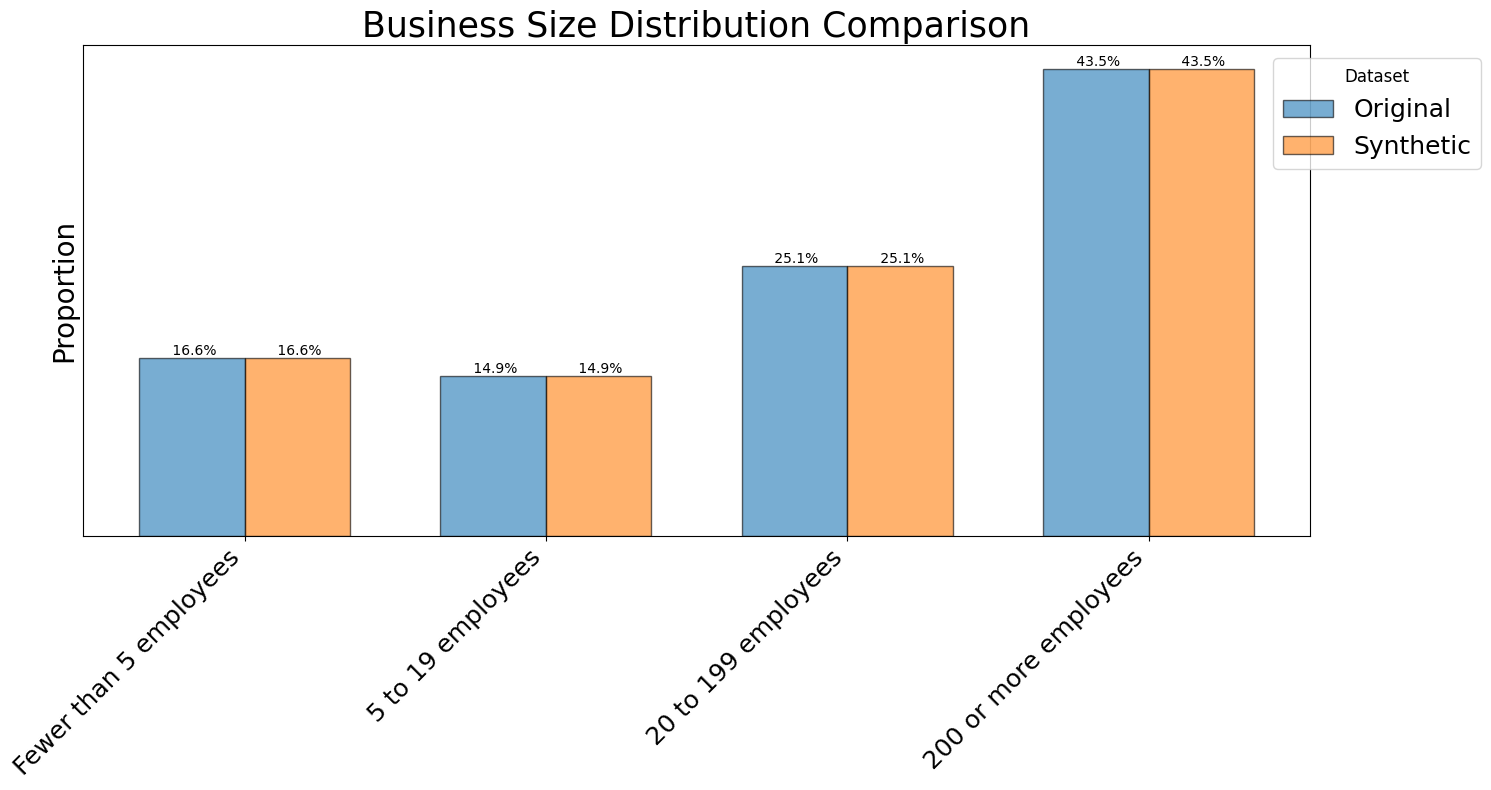

In [91]:
#Plot3.business size

data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Business size_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

#统计每个Business_size的数量（原始=岗位数加总；合成=样本数）
B_order = ["Fewer than 5 employees","5 to 19 employees","20 to 199 employees","200 or more employees"]
orig_cnt = (data1.groupby('feature')['number_of_jobs'].sum().reindex(B_order, fill_value=0))
synth_cnt = (data2['Business_size'].value_counts().reindex(B_order, fill_value=0))

orig_total  = orig_cnt.sum() if orig_cnt.sum() else 1
synth_total = synth_cnt.sum() if synth_cnt.sum() else 1
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

#画分组柱状图并在柱顶加“占比”
x = np.arange(len(B_order))
w = 0.35
fig, ax = plt.subplots(figsize=(15,8))

bars1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',edgecolor='black', alpha=0.6)
bars2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic',edgecolor='black', alpha=0.6)

#文字位置微调
y_offset = 0.01 * max(orig_cnt.max(), synth_cnt.max())

def add_labels(bars, props, counts):
    for bar, prop, count in zip(bars, props, counts):
        height = bar.get_height()
        label = f" {prop:.1%}"  
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            label,
            ha='center', va='bottom'
        )

add_labels(bars1, orig_prop.values,  orig_cnt.values)     
add_labels(bars2, synth_prop.values, synth_cnt.values)

x = np.arange(len(B_order))

ax.set_xticks(x); ax.set_xticklabels(B_order,rotation=45, ha='right', fontsize=18)
ax.set_ylabel("Proportion",fontsize=20)
ax.set_title("Business Size Distribution Comparison",fontsize=25)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks([]) 
ax.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.15, 1),fontsize=18, title_fontsize=12)
fig.tight_layout()
plt.show()

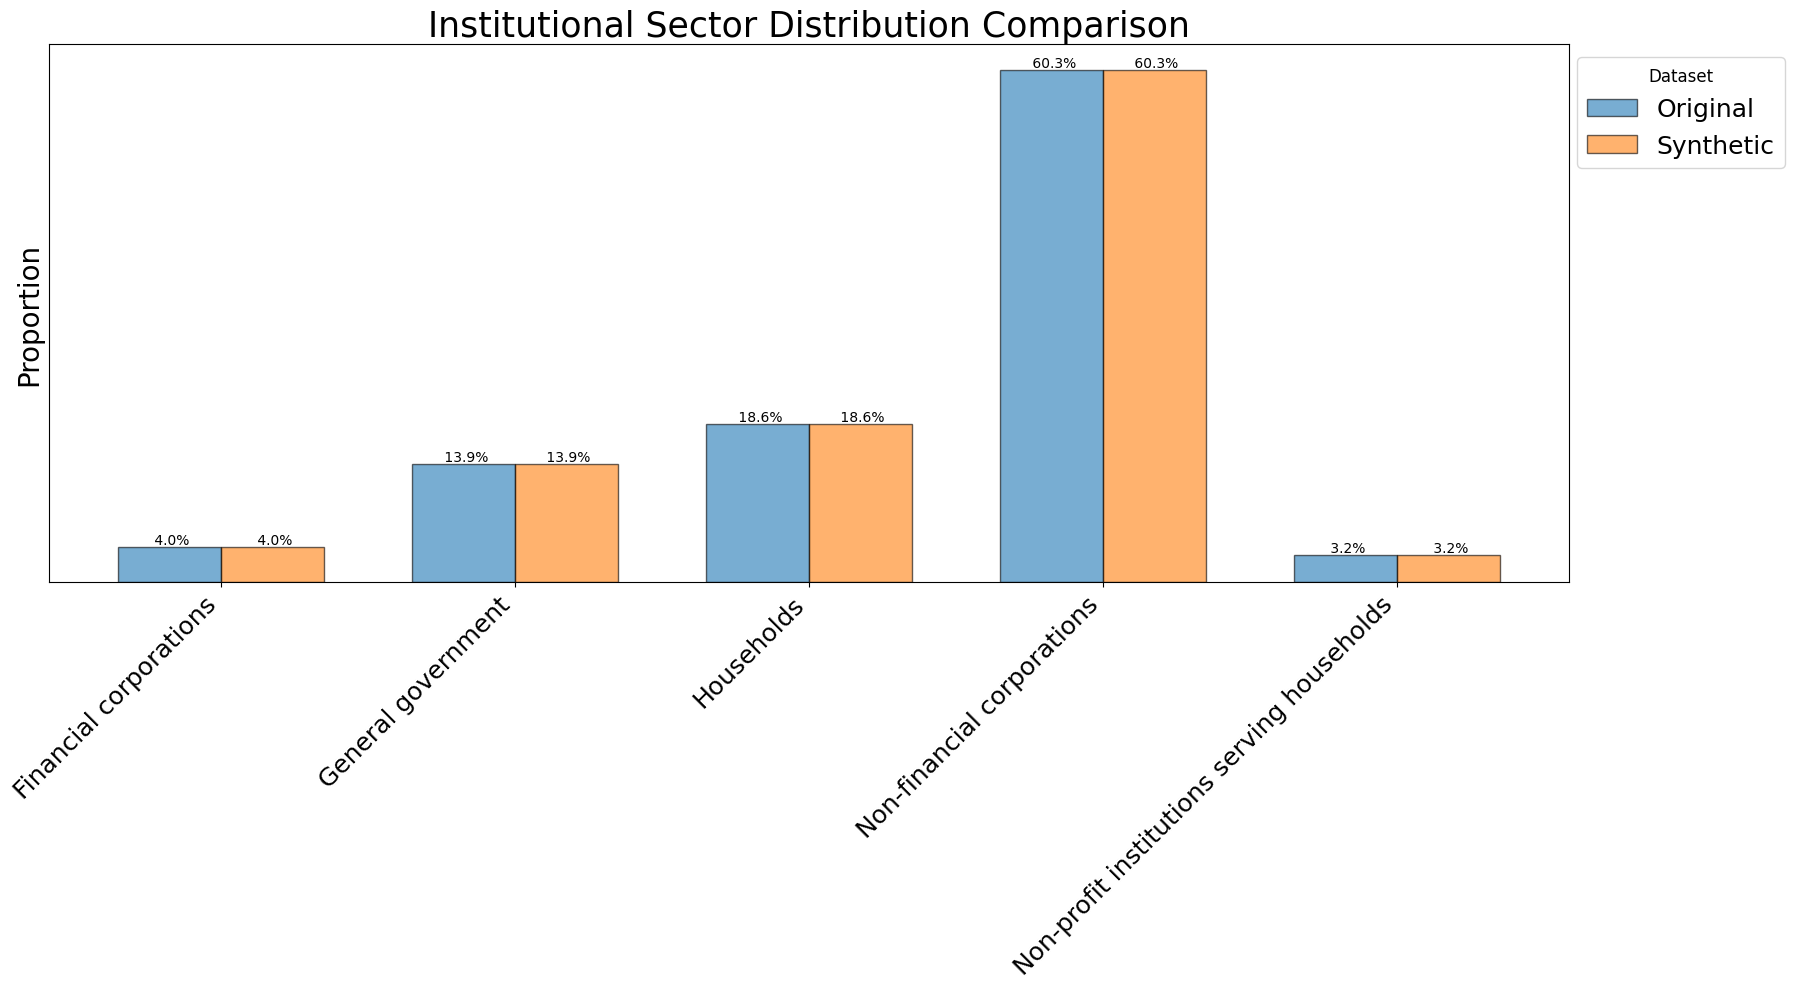

In [79]:
#Plot4.Institutional Sector

data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Institutional sector_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

data1 = (data1.dropna(subset=['feature','number_of_jobs','median_income']).query("gender in ['MALES','FEMALES']").copy())
data1['feature'] = data1['feature'].astype(str).str.strip()
data1['number_of_jobs'] = data1['number_of_jobs'].round().astype(int)
data2['AgeGroup'] = data2['AgeGroup'].astype(str).str.strip()

#统计每个Institutional sector的数量（原始=岗位数加总；合成=样本数）
I_order = ["Financial corporations","General government","Households","Non-financial corporations","Non-profit institutions serving households"]
orig_cnt = (data1.groupby('feature')['number_of_jobs'].sum().reindex(I_order, fill_value=0))
synth_cnt = (data2['Institutional_sector'].value_counts().reindex(I_order, fill_value=0))

orig_total  = orig_cnt.sum() if orig_cnt.sum() else 1
synth_total = synth_cnt.sum() if synth_cnt.sum() else 1
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

#画分组柱状图并在柱顶加“占比”
x = np.arange(len(I_order))
w = 0.35
fig, ax = plt.subplots(figsize=(18,10))

bars1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',edgecolor='black', alpha=0.6)
bars2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic',edgecolor='black', alpha=0.6)

#文字位置微调
y_offset = 0.01 * max(orig_cnt.max(), synth_cnt.max())

def add_labels(bars, props, counts):
    for bar, prop, count in zip(bars, props, counts):
        height = bar.get_height()
        label = f" {prop:.1%}"  
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            label,
            ha='center', va='bottom'
        )

add_labels(bars1, orig_prop.values,  orig_cnt.values)     
add_labels(bars2, synth_prop.values, synth_cnt.values)

x = np.arange(len(I_order))

ax.set_xticks(x); ax.set_xticklabels(I_order,rotation=45, ha='right', fontsize=18)
ax.set_ylabel("Proportion",fontsize=20)
ax.set_title("Institutional Sector Distribution Comparison",fontsize=25)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks([]) 
ax.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.15, 1),fontsize=18, title_fontsize=12)
fig.tight_layout()
plt.show()

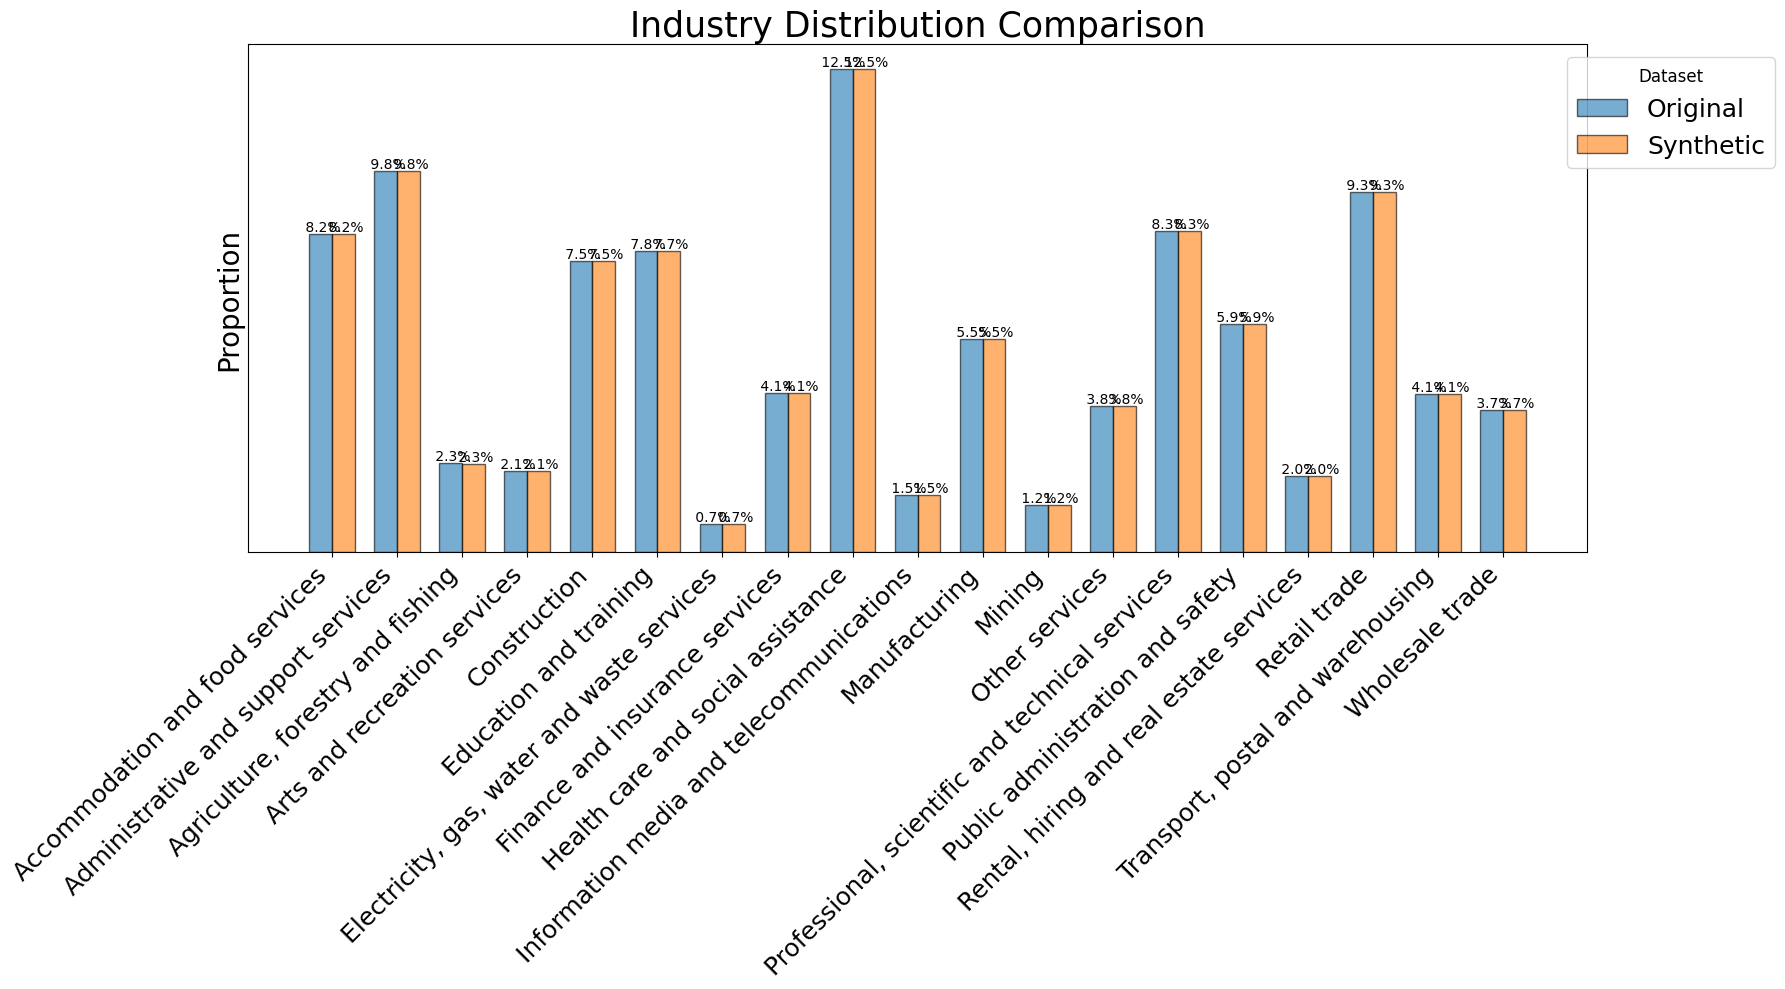

In [78]:
#Plot5.Industry
data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Industry_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

data1 = (data1.dropna(subset=['feature','number_of_jobs','median_income']).query("gender in ['MALES','FEMALES']").copy())
data1['feature'] = data1['feature'].astype(str).str.strip()
data1['number_of_jobs'] = data1['number_of_jobs'].round().astype(int)
data2['Industry'] = data2['Industry'].astype(str).str.strip()

#统计每个Industry的数量（原始=岗位数加总；合成=样本数）
h_order = ["Accommodation and food services","Administrative and support services","Agriculture, forestry and fishing","Arts and recreation services",
           "Construction","Education and training","Electricity, gas, water and waste services","Finance and insurance services",
           "Health care and social assistance","Information media and telecommunications","Manufacturing","Mining","Other services",
           "Professional, scientific and technical services","Public administration and safety","Rental, hiring and real estate services","Retail trade",
           "Transport, postal and warehousing","Wholesale trade"]
orig_cnt = (data1.groupby('feature')['number_of_jobs'].sum().reindex(h_order, fill_value=0))
synth_cnt = (data2['Industry'].value_counts().reindex(h_order, fill_value=0))

orig_total  = orig_cnt.sum() if orig_cnt.sum() else 1
synth_total = synth_cnt.sum() if synth_cnt.sum() else 1
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

#画分组柱状图并在柱顶加“占比”
x = np.arange(len(h_order))
w = 0.35
fig, ax = plt.subplots(figsize=(18,10))

bars1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',edgecolor='black', alpha=0.6)
bars2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic',edgecolor='black', alpha=0.6)

#文字位置微调
y_offset = 0.01 * max(orig_cnt.max(), synth_cnt.max())

def add_labels(bars, props, counts):
    for bar, prop, count in zip(bars, props, counts):
        height = bar.get_height()
        label = f" {prop:.1%}"  
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            label,
            ha='center', va='bottom'
        )

add_labels(bars1, orig_prop.values,  orig_cnt.values)     
add_labels(bars2, synth_prop.values, synth_cnt.values)

x = np.arange(len(h_order))

ax.set_xticks(x); ax.set_xticklabels(h_order,rotation=45, ha='right', fontsize=18)
ax.set_ylabel("Proportion",fontsize=20)
ax.set_title("Industry Distribution Comparison",fontsize=25)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks([]) 
ax.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.15, 1),fontsize=18, title_fontsize=12)
fig.tight_layout()

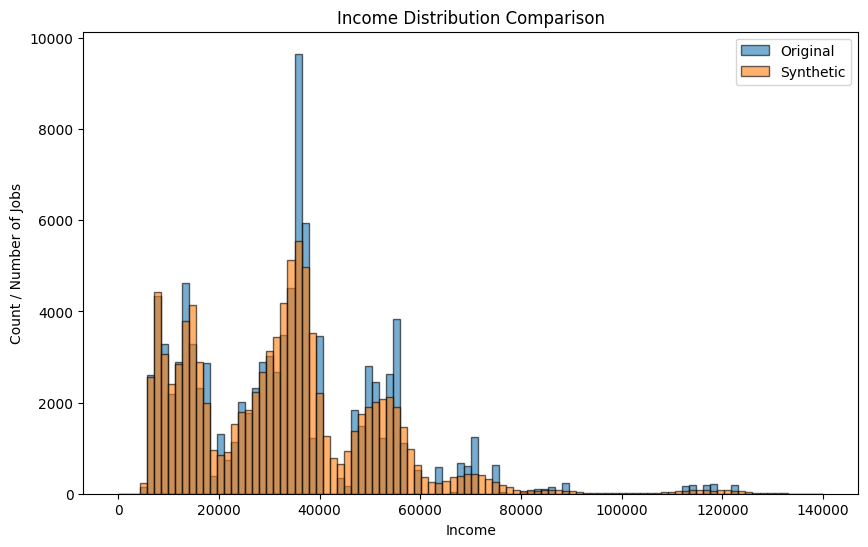

In [93]:
#Plot6.Income
fpath = r"C:\Users\HOU HENGJIN\Desktop\Original data\Industry_gender.csv"
data1 = pd.read_csv(fpath).dropna(subset=['feature', 'number_of_jobs', 'median_income'])
data1 = data1[data1['gender'].isin(['MALES', 'FEMALES'])].reset_index(drop=True)
data1['number_of_jobs'] = data1['number_of_jobs'].round().astype(int)
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

bins = np.linspace(0, 140000, 101) 
plt.figure(figsize=(10, 6))
plt.hist(data1['median_income'], bins=bins, weights=data1['number_of_jobs'], color='tab:blue', edgecolor='black', alpha=0.6, label='Original')
plt.hist(data2['median_income'], bins=bins, color='tab:orange', edgecolor='black', alpha=0.6, label='Synthetic')
plt.xlabel('Income')
plt.ylabel('Count / Number of Jobs')
plt.title('Income Distribution Comparison')
plt.legend()
plt.show()

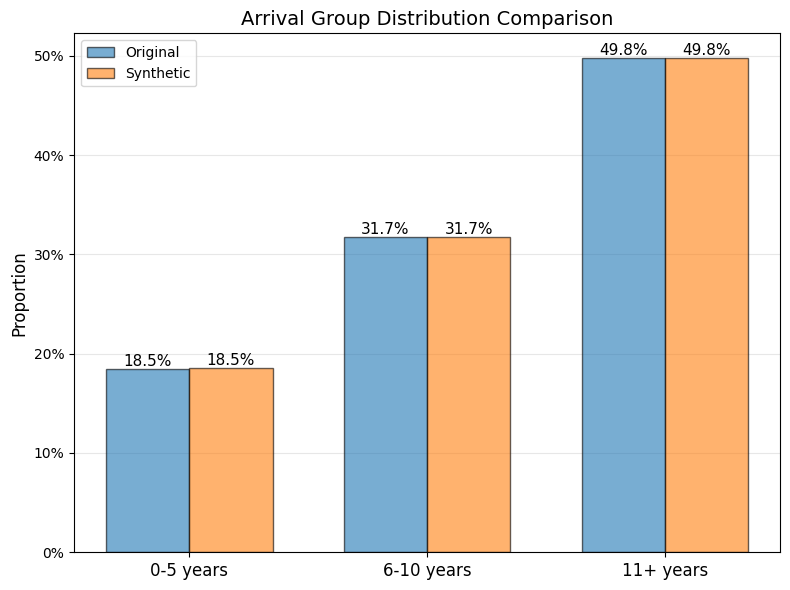

In [94]:
#Plot7.Arrival Group
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 读数据
data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Arrival Group_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

def norm_text(s):
    s = str(s)
    s = s.replace('–','-').replace('—','-')  
    s = re.sub(r'\s*-\s*', '-', s)         
    s = re.sub(r'\s+', ' ', s)               
    return s.strip()

data1 = (data1
         .dropna(subset=['feature','number_of_jobs'])
         .assign(feature=lambda df: df['feature'].map(norm_text),
                 number_of_jobs=lambda df: df['number_of_jobs'].round().astype(int)))

data2 = (data2
         .dropna(subset=['Arrival_group'])
         .assign(Arrival_group=lambda df: df['Arrival_group'].map(norm_text)))

A_order = ["0-5 years","6-10 years","11+ years"]

orig_cnt  = data1.groupby('feature')['number_of_jobs'].sum().reindex(A_order, fill_value=0)
synth_cnt = data2['Arrival_group'].value_counts().reindex(A_order, fill_value=0)

orig_total  = max(orig_cnt.sum(), 1)
synth_total = max(synth_cnt.sum(), 1)
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

# 画图
x = np.arange(len(A_order)); w = 0.35
fig, ax = plt.subplots(figsize=(8,6))
b1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',  edgecolor='black', alpha=0.6)
b2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic', edgecolor='black', alpha=0.6)

for bars, props in [(b1, orig_prop.values), (b2, synth_prop.values)]:
    for bar, p in zip(bars, props):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f"{p:.1%}",
                ha='center', va='bottom', fontsize=11)

ax.set_xticks(x)
ax.set_xticklabels(A_order, fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_title("Arrival Group Distribution Comparison", fontsize=14)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(axis='y', alpha=0.3); ax.set_axisbelow(True)
ax.legend()
fig.tight_layout()
plt.show()

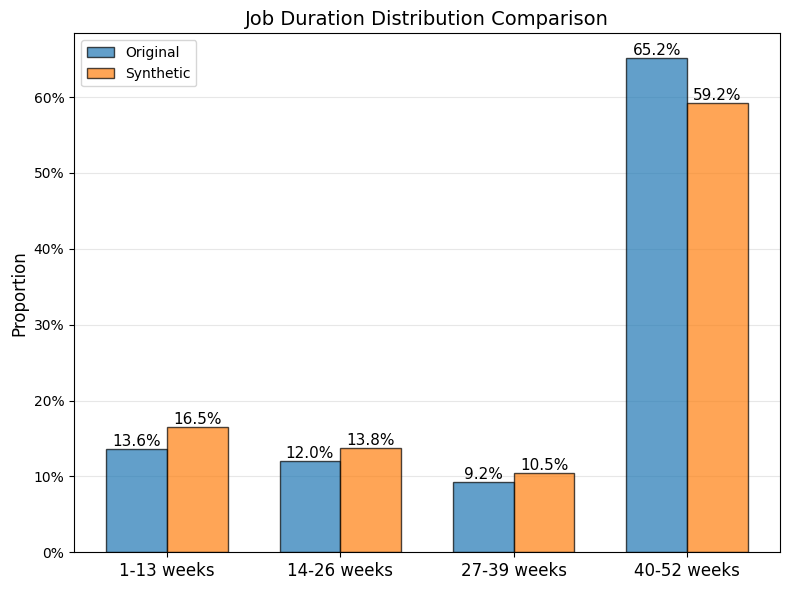

In [77]:
#Plot8.Job Duration
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 读数据
data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Job duration_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")
def norm_text(s):
    s = str(s)
    s = s.replace('–','-').replace('—','-')
    s = re.sub(r'\s*to\s*', '-', s, flags=re.I)  
    s = re.sub(r'\s*-\s*', '-', s)
    s = re.sub(r'\s+', ' ', s).strip()
    s = re.sub(r'week(s)?$', 'weeks', s, flags=re.I)
    return s

# 清洗后两张表都用 norm_text
data1['feature']      = data1['feature'].map(norm_text)
data2['Job_duration'] = data2['Job_duration'].map(norm_text)

data1 = (data1
         .dropna(subset=['feature','number_of_jobs'])
         .assign(feature=lambda df: df['feature'].map(norm_text),
                 number_of_jobs=lambda df: df['number_of_jobs'].round().astype(int)))
data2 = (data2.dropna(subset=['Job_duration'])
               .assign(Job_duration=lambda df: df['Job_duration'].map(norm_text)))

A_order = ["1-13 weeks","14-26 weeks","27-39 weeks","40-52 weeks"]  # 四个都用 '-'

orig_cnt  = data1.groupby('feature')['number_of_jobs'].sum().reindex(A_order, fill_value=0)
synth_cnt = data2['Job_duration'].value_counts().reindex(A_order, fill_value=0)

orig_total  = max(orig_cnt.sum(), 1)
synth_total = max(synth_cnt.sum(), 1)
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

# 画图
x = np.arange(len(A_order)); w = 0.35
fig, ax = plt.subplots(figsize=(8,6))
b1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',  edgecolor='black', alpha=0.6)
b2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic', edgecolor='black', alpha=0.6)

for bars, props in [(b1, orig_prop.values), (b2, synth_prop.values)]:
    for bar, p in zip(bars, props):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f"{p:.1%}",
                ha='center', va='bottom', fontsize=11)

ax.set_xticks(x)
ax.set_xticklabels(A_order, fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_title("Job Duration Distribution Comparison", fontsize=14)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(axis='y', alpha=0.3); ax.set_axisbelow(True)
ax.legend()
fig.tight_layout()
plt.show()

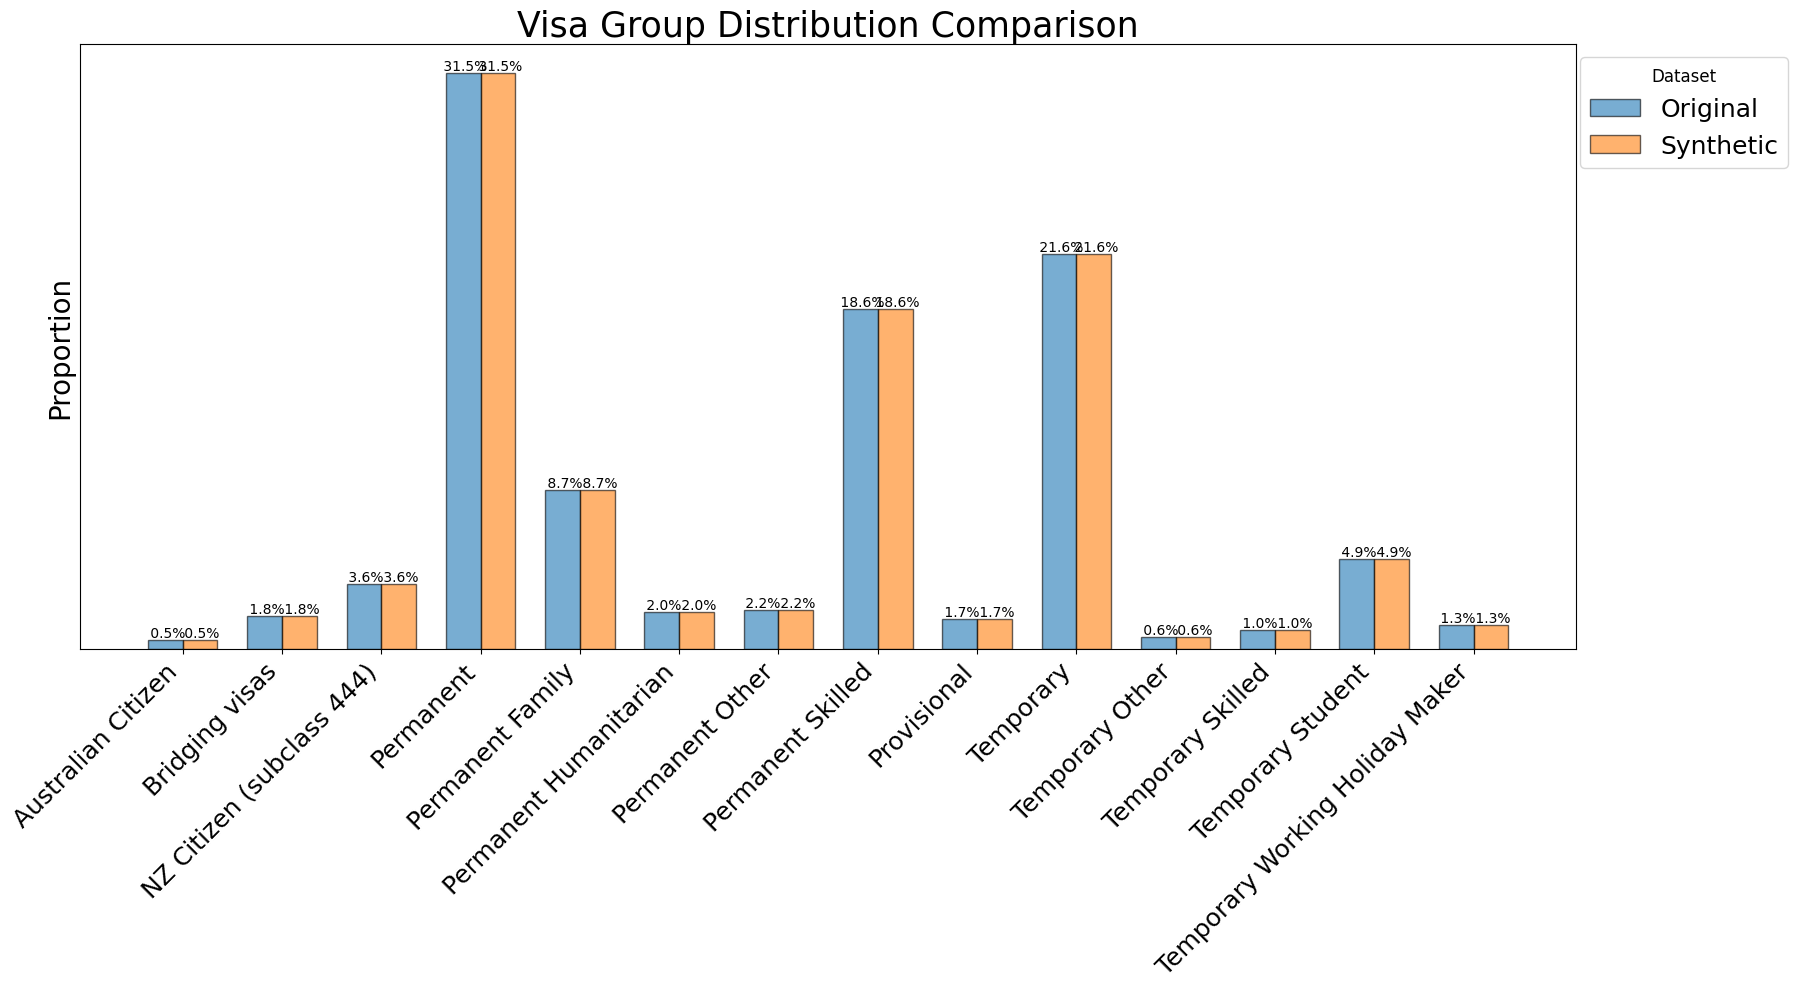

In [85]:
#Plot9.Visa Group
data1 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\Original data\Visa group_gender.csv")
data2 = pd.read_csv(r"C:\Users\HOU HENGJIN\Desktop\assuming_independent_initial_synthetic.csv")

#统计每个Visa Group的数量（原始=岗位数加总；合成=样本数）
V_order = ["Australian Citizen","Bridging visas","NZ Citizen (subclass 444)","Permanent","Permanent Family","Permanent Humanitarian",
           "Permanent Other","Permanent Skilled","Provisional","Temporary","Temporary Other","Temporary Skilled","Temporary Student",
           "Temporary Working Holiday Maker"]
orig_cnt = (data1.groupby('feature')['number_of_jobs'].sum().reindex(V_order, fill_value=0))
synth_cnt = (data2['Visa_group'].value_counts().reindex(V_order, fill_value=0))

orig_total  = orig_cnt.sum() if orig_cnt.sum() else 1
synth_total = synth_cnt.sum() if synth_cnt.sum() else 1
orig_prop   = orig_cnt / orig_total
synth_prop  = synth_cnt / synth_total

#画分组柱状图并在柱顶加“占比”
x = np.arange(len(V_order))
w = 0.35
fig, ax = plt.subplots(figsize=(18,10))

bars1 = ax.bar(x - w/2, orig_prop.values,  width=w, label='Original',edgecolor='black', alpha=0.6)
bars2 = ax.bar(x + w/2, synth_prop.values, width=w, label='Synthetic',edgecolor='black', alpha=0.6)

#文字位置微调
y_offset = 0.01 * max(orig_cnt.max(), synth_cnt.max())

def add_labels(bars, props, counts):
    for bar, prop, count in zip(bars, props, counts):
        height = bar.get_height()
        label = f" {prop:.1%}"  
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            label,
            ha='center', va='bottom'
        )

add_labels(bars1, orig_prop.values,  orig_cnt.values)     
add_labels(bars2, synth_prop.values, synth_cnt.values)

x = np.arange(len(V_order))

ax.set_xticks(x); ax.set_xticklabels(V_order,rotation=45, ha='right', fontsize=18)
ax.set_ylabel("Proportion",fontsize=20)
ax.set_title("Visa Group Distribution Comparison",fontsize=25)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks([]) 
ax.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.15, 1),fontsize=18, title_fontsize=12)
fig.tight_layout()